# Machine Learning Part 1

## Linear Analysis
In this part, we use machine learning to get a model to determine likelyhood of side effects.

In [24]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
# Get json obtained from database
vae_df = pd.read_json("vaers-final-2021.json")
vae_df = vae_df.drop(columns="_id")
vae_df.head()

,VAERS_ID,RECVDATE,STATE,STATE_NAME,LATITUDE,LONGITUDE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,01/01/2021,TX,Texas,31.968599,-99.901813,33,33,,F,...,Dysphagia,23.1,Epiglottitis,23.1,0,0.0,0,0.0,0,0.0
1,916601,01/01/2021,CA,California,36.778261,-119.417932,73,73,,F,...,Anxiety,23.1,Dyspnoea,23.1,0,0.0,0,0.0,0,0.0
2,916602,01/01/2021,WA,Washington,47.751074,-120.740139,23,23,,F,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,0,0.0
3,916603,01/01/2021,WA,Washington,47.751074,-120.740139,58,58,,F,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,0,0.0,0,0.0
4,916604,01/01/2021,TX,Texas,31.968599,-99.901813,47,47,,F,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,0,0.0


In [3]:
#Get column names
print(vae_df.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'STATE_NAME', 'LATITUDE', 'LONGITUDE',
       'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT',
       'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS',
       'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE', 'VAX_MANU',
       'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME',
       'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2',
       'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4',
       'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')


In [4]:
# Drop columns
vae_df = vae_df.drop(["SYMPTOMVERSION1","SYMPTOMVERSION2","SYMPTOMVERSION3",
                      "SYMPTOMVERSION4","SYMPTOMVERSION5"],axis=1)
vae_df.head()

,VAERS_ID,RECVDATE,STATE,STATE_NAME,LATITUDE,LONGITUDE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,01/01/2021,TX,Texas,31.968599,-99.901813,33,33,,F,...,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,0,0,0
1,916601,01/01/2021,CA,California,36.778261,-119.417932,73,73,,F,...,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,0,0,0
2,916602,01/01/2021,WA,Washington,47.751074,-120.740139,23,23,,F,...,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,0
3,916603,01/01/2021,WA,Washington,47.751074,-120.740139,58,58,,F,...,unknown,UNK,0,0,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,0,0
4,916604,01/01/2021,TX,Texas,31.968599,-99.901813,47,47,,F,...,0,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,0


In [5]:
# Create column with number of VAEs per patient
sympcounts = []
for index, row in vae_df.iterrows():
    counter = 0
    columns = ["SYMPTOM1","SYMPTOM2","SYMPTOM3","SYMPTOM4","SYMPTOM5"]
    for column in columns:
        if row[column] != "0":
            counter = counter + 1
    sympcounts.append(counter)
vae_df["SYMPTOM_COUNT"] = sympcounts
vae_df.head()

,VAERS_ID,RECVDATE,STATE,STATE_NAME,LATITUDE,LONGITUDE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,SYMPTOM_COUNT
0,916600,01/01/2021,TX,Texas,31.968599,-99.901813,33,33,,F,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,0,0,0,2
1,916601,01/01/2021,CA,California,36.778261,-119.417932,73,73,,F,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,0,0,0,2
2,916602,01/01/2021,WA,Washington,47.751074,-120.740139,23,23,,F,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,0,4
3,916603,01/01/2021,WA,Washington,47.751074,-120.740139,58,58,,F,...,UNK,0,0,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,0,0,3
4,916604,01/01/2021,TX,Texas,31.968599,-99.901813,47,47,,F,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,0,4


### Analysis 1: Age Vs. Severity of Reaction (Number of Symptoms)

In [6]:
# Get values for age and severity, clean data from outliers
clean = vae_df[vae_df["VAX_TYPE"]=="COVID19"]
agesev_df = pd.DataFrame(clean[["AGE_YRS","SYMPTOM_COUNT"]])
agesev_df["AGE_YRS"].replace('', np.nan, inplace=True)
agesev_df.dropna(subset=['AGE_YRS'], inplace=True)
agesev_df["AGE_YRS"] = pd.to_numeric(agesev_df["AGE_YRS"])
agesev_df = agesev_df[agesev_df["AGE_YRS"]>=18]
agesev_df = agesev_df[agesev_df["AGE_YRS"]<=100]
agesev_df = agesev_df.groupby(["AGE_YRS"], as_index=False).mean()
agesev_df.head()

,AGE_YRS,SYMPTOM_COUNT
0,18.0,3.369565
1,19.0,3.824176
2,20.0,3.710744
3,21.0,3.671053
4,22.0,3.660633


In [7]:
# Define as X and Y
X = agesev_df.AGE_YRS.to_list()
y = agesev_df.SYMPTOM_COUNT.to_list()

In [8]:
# Create model
X = agesev_df.AGE_YRS.values.reshape(-1, 1)
y = agesev_df.SYMPTOM_COUNT.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_[0][0])
print('y-axis intercept: ', model.intercept_[0])

Weight coefficients:  -0.007144763942699247
y-axis intercept:  3.9248346959046336


In [9]:
# Create equation for plotting
slope1 = model.coef_[0][0]
intcp1 = model.intercept_[0]
equation1 = slope1 * X + intcp1

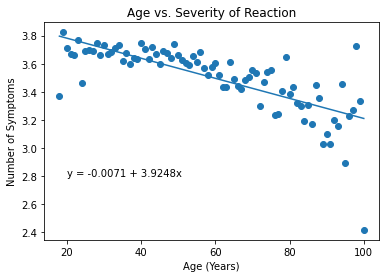

In [10]:
# Plot data
line_eq1 = f"y = {round(model.coef_[0][0],4)} + {round(model.intercept_[0],4)}x"
plt.scatter(X, y)
plt.plot(X,equation1)
plt.title('Age vs. Severity of Reaction')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Symptoms')
plt.annotate(line_eq1,(20,2.8),fontsize=10,color="black")
plt.show()

### Analysis 2: Age Vs. Severity of Reaction (Number of Symptoms) - Pfizer

In [11]:
# Get values for age and severity, clean data from outliers
clean = vae_df[vae_df["VAX_NAME"]=="COVID19 (COVID19 (PFIZER-BIONTECH))"]
agesev_df = pd.DataFrame(clean[["AGE_YRS","SYMPTOM_COUNT"]])
agesev_df["AGE_YRS"].replace('', np.nan, inplace=True)
agesev_df.dropna(subset=['AGE_YRS'], inplace=True)
agesev_df["AGE_YRS"] = pd.to_numeric(agesev_df["AGE_YRS"])
agesev_df = agesev_df[agesev_df["AGE_YRS"]>=18]
agesev_df = agesev_df[agesev_df["AGE_YRS"]<=100]
agesev_df = agesev_df.groupby(["AGE_YRS"], as_index=False).mean()
agesev_df.head()

,AGE_YRS,SYMPTOM_COUNT
0,18.0,3.300000
1,19.0,3.500000
2,20.0,3.804348
3,21.0,3.609375
4,22.0,3.425743


In [12]:
# Define as X and Y
X = agesev_df.AGE_YRS.to_list()
y = agesev_df.SYMPTOM_COUNT.to_list()

In [13]:
# Create model
X = agesev_df.AGE_YRS.values.reshape(-1, 1)
y = agesev_df.SYMPTOM_COUNT.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_[0][0])
print('y-axis intercept: ', model.intercept_[0])

Weight coefficients:  -0.003653645080015578
y-axis intercept:  3.7436145163591017


In [14]:
# Create equation for plotting
slope1 = model.coef_[0][0]
intcp1 = model.intercept_[0]
equation1 = slope1 * X + intcp1

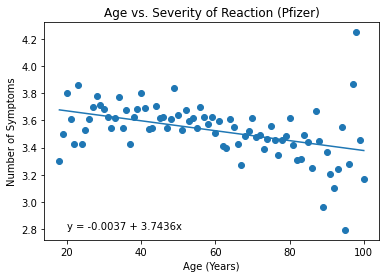

In [15]:
# Plot data
line_eq2 = f"y = {round(model.coef_[0][0],4)} + {round(model.intercept_[0],4)}x"
plt.scatter(X, y)
plt.plot(X,equation1)
plt.title('Age vs. Severity of Reaction (Pfizer)')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Symptoms')
plt.annotate(line_eq2,(20,2.8),fontsize=10,color="black")
plt.show()

### Analysis 3: Age Vs. Severity of Reaction (Number of Symptoms) - Moderna

In [16]:
# Get values for age and severity, clean data from outliers
clean = vae_df[vae_df["VAX_NAME"]=="COVID19 (COVID19 (MODERNA))"]
agesev_df = pd.DataFrame(clean[["AGE_YRS","SYMPTOM_COUNT"]])
agesev_df["AGE_YRS"].replace('', np.nan, inplace=True)
agesev_df.dropna(subset=['AGE_YRS'], inplace=True)
agesev_df["AGE_YRS"] = pd.to_numeric(agesev_df["AGE_YRS"])
agesev_df = agesev_df[agesev_df["AGE_YRS"]>=18]
agesev_df = agesev_df[agesev_df["AGE_YRS"]<=100]
agesev_df = agesev_df.groupby(["AGE_YRS"], as_index=False).mean()
agesev_df.head()

,AGE_YRS,SYMPTOM_COUNT
0,18.0,3.388889
1,19.0,4.065217
2,20.0,3.600000
3,21.0,3.610390
4,22.0,3.814815


In [17]:
# Define as X and Y
X = agesev_df.AGE_YRS.to_list()
y = agesev_df.SYMPTOM_COUNT.to_list()

In [18]:
# Create model
X = agesev_df.AGE_YRS.values.reshape(-1, 1)
y = agesev_df.SYMPTOM_COUNT.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_[0][0])
print('y-axis intercept: ', model.intercept_[0])

Weight coefficients:  -0.009658655248366252
y-axis intercept:  4.036238301258302


In [19]:
# Create equation for plotting
slope1 = model.coef_[0][0]
intcp1 = model.intercept_[0]
equation1 = slope1 * X + intcp1

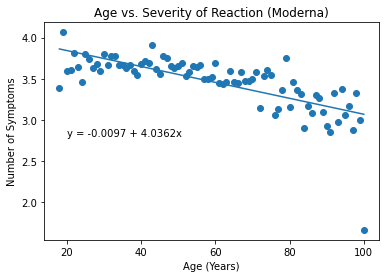

In [20]:
# Plot data
line_eq2 = f"y = {round(model.coef_[0][0],4)} + {round(model.intercept_[0],4)}x"
plt.scatter(X, y)
plt.plot(X,equation1)
plt.title('Age vs. Severity of Reaction (Moderna)')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Symptoms')
plt.annotate(line_eq2,(20,2.8),fontsize=10,color="black")
plt.show()